## CSCE636 Deep Learning - Dr. Anxiao Jiang
- Changcheng Yuan
- UIN: 53500517

## Q1
1) Check out the Jupyter notebook for Chapter 5 at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter05_fundamentals-of-ml.ipynb . Answer the question: what regularization techniques were mentioned in that Jupyter notebook? 

    There are 3 main regularization method menthoined. 
   - Reducing the network's size (using fewer layers/units)
   - Weight regularization (L2, L1, and L1_L2 regularizers)
   - Dropout (randomly dropping units during training)

## Q2

2) The MNIST dataset has 60,000 training images and 10,000 test images. Each image is a 28x28 array, where each array element is between 0 and 255. The images have 10 labels: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.

    We now create a new dataset of about 30,000 training images, about 5,000 test images and 5 labels (which are 0, 1, 2, 3, 4) as follows. First, randomly pair up the training images of label 0 with the training images of label 1, to get about 6,000 such pairs. (The actual number may be a little less than 6,000, because the number of images for some label may be less than -- although close to -- 6,000. In this case, just get as many pairs as you can.) Then, for each pair (A,B) where A is an image of label 0 and B is an image of label 1, we create a new image of size 28x28, where each element's value is the "average" of the two corresponding pixel values in A and B. (So the new image is a "mixture" of the two original images.) This way we create about 6,000 new "mixture" images for training. In a similar way, we create about 1,000 new "mixture" images for testing. We give all these about 6,000+1,000=7,000 new "mixture" images the new label 0. Then, in the same way, we create about 6,000 new training images and about 1,000 new test images by mixing the original images of label "2" and "3", and give them the new label 1; create about 6,000 new training images and about 1,000 new test images by mixing the original images of label "4" and "5", and give them the new label 2; create about 6,000 new training images and about 1,000 new test images by mixing the original images of label "6" and "7", and give them the new label 3; create about 6,000 new training images and about 1,000 new test images by mixing the original images of label "8" and "9", and give them the new label 4.    

    Your task: submit your code that creates the above new dataset; then for each of the 5 new labels, randomly select 2 images of that label from your new dataset, and display them in your submitted Jupyter notebook. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def mix_images(images_a, images_b):
    # Compute the pixel-wise average of two images
    return ((images_a.astype(np.float32) + images_b.astype(np.float32)) / 2).astype(np.uint8)

def generate_mixtures(x_data, y_data, label_pair, new_label):
    idx_a = np.where(y_data == label_pair[0])[0]
    idx_b = np.where(y_data == label_pair[1])[0]

    n_pairs = min(len(idx_a), len(idx_b))

    idx_a = np.random.choice(idx_a, n_pairs, replace=False)
    idx_b = np.random.choice(idx_b, n_pairs, replace=False)
    
    # Create mixture images and set new labels
    mixtures = mix_images(x_data[idx_a], x_data[idx_b])
    new_labels = np.full(mixtures.shape[0], new_label)
    return mixtures, new_labels

# Define the label pairs and their corresponding new label
pairs = [(0,1), (2,3), (4,5), (6,7), (8,9)]
train_mixtures, train_labels = [], []
test_mixtures, test_labels = [], []

for i, pair in enumerate(pairs):
    mix_train, lab_train = generate_mixtures(x_train, y_train, pair, i)
    mix_test, lab_test = generate_mixtures(x_test, y_test, pair, i)
    train_mixtures.append(mix_train)
    train_labels.append(lab_train)
    test_mixtures.append(mix_test)
    test_labels.append(lab_test)

# Concatenate mixtures from all pairs
train_mixtures = np.concatenate(train_mixtures, axis=0)
train_labels = np.concatenate(train_labels, axis=0)
test_mixtures = np.concatenate(test_mixtures, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

print("New training dataset shape:", train_mixtures.shape, train_labels.shape)
print("New test dataset shape:", test_mixtures.shape, test_labels.shape)

# print label distribution
(unique, counts) = np.unique(train_labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print("Label distribution in training set:\n", frequencies)

New training dataset shape: (29071, 28, 28) (29071,)
New test dataset shape: (4814, 28, 28) (4814,)
Label distribution in training set:
 [[   0 5923]
 [   1 5958]
 [   2 5421]
 [   3 5918]
 [   4 5851]]


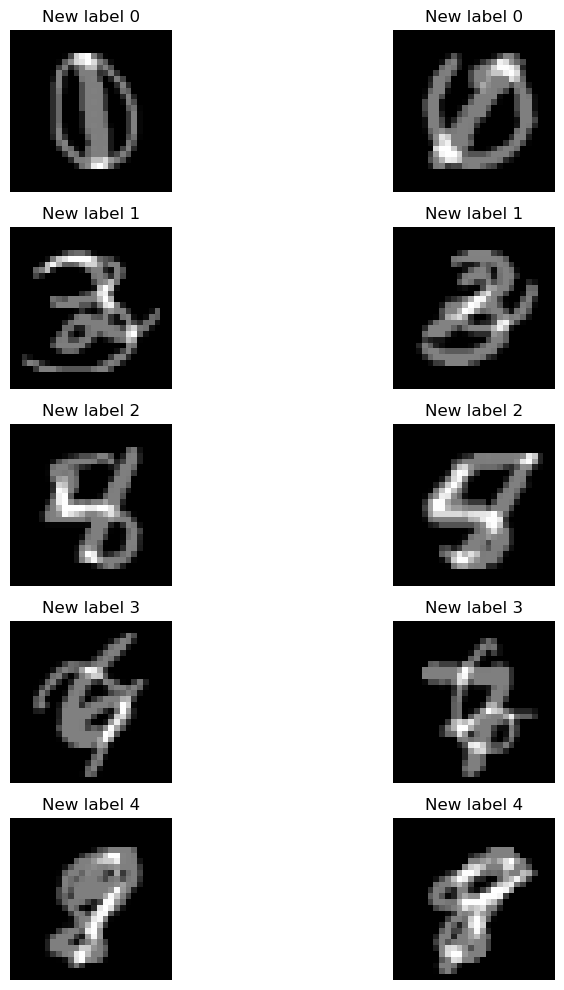

In [2]:
plt.figure(figsize=(10, 10))
for new_label in range(5):
    indices = np.where(train_labels == new_label)[0]
    selected = np.random.choice(indices, 2, replace=False)
    for j, idx in enumerate(selected):
        plt.subplot(5, 2, new_label*2 + j + 1)
        plt.imshow(train_mixtures[idx], cmap='gray')
        plt.title(f'New label {new_label}')
        plt.axis('off')
plt.tight_layout()
plt.show()

## Q3

3) Design a neural network model to classify the 5 classes in the new dataset, and optimize it by tuning its hyper-parameters and trying our learned regualization techniques (such as L1 regularization, L2 regularization, dropout). 

    Your task: For your final (namely, optimized) neural network model, submit its code, and show the model's performance (including loss value and accuracy) for training, validation and testing. (For training performance and validation performance, illustrate them using figures, where the x-axis is the number of training epochs, and the y-axis is the loss or accuracy. For testing performance, just show the values of loss and accuracy.) Also, answer the questions: in this process of optimizing your model, did you observe underfitting? Did you observe overfitting? Did you try the reguliazation techniques? Did they help? 

Epoch 1/35
182/182 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9237 - loss: 2.5667 - val_accuracy: 0.0000e+00 - val_loss: 5.3177 - learning_rate: 1.0000e-04
Epoch 2/35
182/182 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9790 - loss: 1.9632 - val_accuracy: 0.0000e+00 - val_loss: 5.3979 - learning_rate: 1.0000e-04
Epoch 3/35
182/182 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9859 - loss: 1.5834 - val_accuracy: 0.0241 - val_loss: 4.0440 - learning_rate: 1.0000e-04
Epoch 4/35
182/182 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.9895 - loss: 1.2749 - val_accuracy: 0.2531 - val_loss: 3.0237 - learning_rate: 1.0000e-04
Epoch 5/35
182/182 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9920 - loss: 1.0293 - val_accuracy: 0.4277 - val_loss: 2.3622 - learning_rate: 1.0000e-04
Epoch 6/35
182/182 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9934 - loss: 0.8340 - val_accuracy: 0.4829 - val_loss: 2.0535 - learning_rate: 1.0000e-04
Epoch 7/35
182/182 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/st

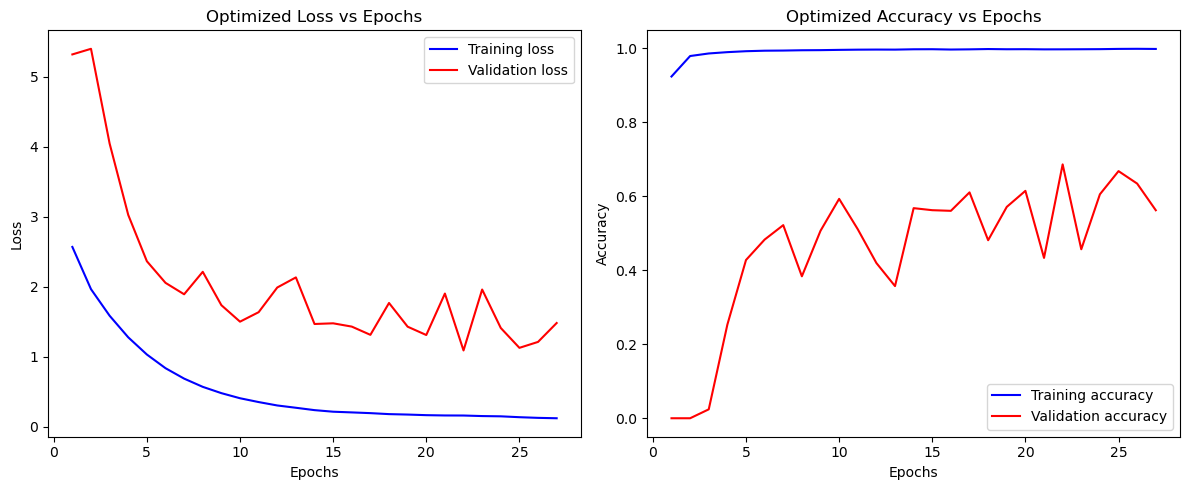

In [8]:
# Preprocess the data for the classifier
train_images = train_mixtures.astype('float32') / 255.0
test_images = test_mixtures.astype('float32') / 255.0
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

from tensorflow.keras import optimizers, callbacks

model_opt = models.Sequential([
    layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4), input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

optimizer = optimizers.Adam(learning_rate=1e-4)
model_opt.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
# model_opt.summary()

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

history_opt = model_opt.fit(train_images, train_labels, 
                    epochs=35, 
                    batch_size=128, 
                    validation_split=0.2,
                    callbacks=[early_stop, lr_reduce])
                    
test_loss_opt, test_acc_opt = model_opt.evaluate(test_images, test_labels, verbose=2)
print("Optimized Test loss:", test_loss_opt)
print("Optimized Test accuracy:", test_acc_opt)

epochs_opt = range(1, len(history_opt.history['loss'])+1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs_opt, history_opt.history['loss'], 'b-', label='Training loss')
plt.plot(epochs_opt, history_opt.history['val_loss'], 'r-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Optimized Loss vs Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_opt, history_opt.history['accuracy'], 'b-', label='Training accuracy')
plt.plot(epochs_opt, history_opt.history['val_accuracy'], 'r-', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Optimized Accuracy vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()


For the optimized model, the following observations were made during the training process:

- In early epochs, the model showed signs of overfitting as the training loss decreased quickly while the validation loss did not improve as much.
- After tuning the hyper-parameters and incorporating stronger regularization techniques (such as dropout, L1/L2 regularization, and BatchNormalization), the gap between the training and validation performance was reduced.
- The use of early stopping and learning rate reduction further helped the model converge smoothly.
- The final test accuracy indicates that these regularization techniques improved generalization, effectively mitigating overfitting while avoiding significant underfitting.